# this file i changed the fraction to 0.1 and then used a more advanced nn sturcture

In [1]:
import uproot3 # for reading root files
import pandas as pd
import time # for data manipulation
import numpy as np
import math # for math functions
import matplotlib.pyplot as plt # for plotting
import os # for file manipulation
import sys # for system functions
from matplotlib.ticker import AutoMinorLocator, AutoLocator
import matplotlib.ticker as ticker

import infofile #local file containing into on cross-section, sums of wights, dataset IDs 
#i don't konw if i need to rewrite this file or not


#read my local file


step one define lumi and all the variables

In [2]:
lumi = 10 # in fb-1

fraction = 0.1 # fraction of the data to be used for training 
#let's start with 3% of the data

filepath = "/Users/xin/Documents/Documents/College/Phys_392/notebooks-collection-opendata/13-TeV-examples/uproot_python/data" # local path to the data files



In [3]:


# df = pd.read_csv("metadata.csv")
# signal = df[df['physics_short'].str.contains("ggH125") & df['dataset_name'].str.contains("ZZ4l", case=False)]
# background = df[df['physics_short'].str.contains("ZZ4l", case=False) & ~df['dataset_name'].str.contains("H")]
# print("Signal:\n", signal)
# print("Background:\n", background)


atempt to get teh meta data from cern using atlas open magic
https://opendata.atlas.cern/docs/data/atlasopenmagic 

In [4]:
# df = pd.read_csv("metadata.csv") # read the metadata file 

# print(df.head()) # print the first few rows of the metadata file



# # Filter the dataframe for 13 TeV data (assuming there's a column named 'Energy')
# df_13tev = df[df['Energy'].str.contains('13 TeV', case=False, na=False)]

# # Save the filtered result
# df_13tev.to_csv("13tev_metadata.csv", index=False)

# # Display a few rows to confirm
# print(df_13tev.head())


In [5]:
# import atlasopenmagic as atom

# # List available releases
# print(atom.available_releases())

# # Set the release (correcting the function call)
# atom.set_release('2024r-pp')

# # Fetch metadata for a specific dataset
# all_metadata = atom.get_metadata('301215')

# # Print the metadata to verify
# print(all_metadata)

In [6]:
import uproot3
import pandas as pd

# def read_root_to_df(path, tree_name="CollectionTree", branches=None):
#     """
#     Open a ROOT file, grab the specified TTree, pull out the branches,
#     and return a pandas DataFrame.
#     - path: path to your .root file
#     - tree_name: the TTree inside the file (e.g. "mini")
#     - branches: list of branch names to read (None = all branches)
#     """
#     # 2.1 Open the file and TTree
#     file = uproot3.open(path)
#     tree = file[tree_name]
    
#     # 2.2 Read branches into a DataFrame
#     if branches is None:
#         return tree.arrays(library="pd")
#     else:
#         return tree.arrays(branches, library="pd")





def read_root_to_df(path, tree_name="CollectionTree", branches=None):
    f    = uproot3.open(path)
    tree = f[tree_name]

    # if branches is None, reads all branches
    if branches is None:
        return tree.pandas.df()
    else:
        return tree.pandas.df(branches)


In [10]:
import os

# Ensure relative paths are correctly set
base_dir = os.getcwd()
signal_path = os.path.join(base_dir, "data/DAOD_PHYSLITE.38191712._000001.pool.root.1")
background_path = os.path.join(base_dir, "data/DAOD_PHYSLITE.37110937._000011.pool.root.1")


In [11]:
tree_name = "CollectionTree"   # change if your tree has a different label

branches = [
    "lep_charge",
    "lep_type",
    "lep_pt",
    "mcWeight",
    "scaleFactor_PILEUP",
    "scaleFactor_ELE",
    "scaleFactor_MUON",
    "scaleFactor_LepTRIGGER"
]


checks

In [12]:
import uproot3


# open the file
f = uproot3.open(signal_path)

# print everything at the root level
print(f.keys())


OverflowError: Python integer 594185995 out of bounds for uint8

In [ ]:
import uproot3

signal_path = "/Users/xin/Documents/Documents/College/Phys_392/notebooks-collection-opendata/13-TeV-examples/uproot_python/data/DAOD_PHYSLITE.38191712._000001.pool.root.1"
f = uproot3.open(signal_path)
branches = f["CollectionTree"].keys()
# decode bytes to strings
branch_names = [b.decode("utf-8").rstrip(";1") for b in branches]
print("\n".join(branch_names))


xTrigDecisionAux.
METAssoc_AnalysisMETAux.
EventInfoAux.
Kt4EMPFlowEventShapeAux.
AnalysisElectronsAux.
AnalysisJetsAux.
AnalysisLargeRJetsAux.
AnalysisMuonsAux.
AnalysisPhotonsAux.
AnalysisSiHitElectronsAux.
AnalysisTauJetsAux.
AnalysisTrigMatch_HLT_2e12_lhloose_L12EM10VHAux.
AnalysisTrigMatch_HLT_2e12_lhloose_mu10Aux.
AnalysisTrigMatch_HLT_2e12_lhloose_nod0_mu10Aux.
AnalysisTrigMatch_HLT_2e12_lhloose_nodeta_L12EM10VHAux.
AnalysisTrigMatch_HLT_2e12_lhloose_nodphires_L12EM10VHAux.
AnalysisTrigMatch_HLT_2e12_lhvloose_L12EM10VHAux.
AnalysisTrigMatch_HLT_2e12_lhvloose_nod0_L12EM10VHAux.
AnalysisTrigMatch_HLT_2e15_lhvloose_L12EM13VHAux.
AnalysisTrigMatch_HLT_2e15_lhvloose_nod0_L12EM13VHAux.
AnalysisTrigMatch_HLT_2e17_lhvlooseAux.
AnalysisTrigMatch_HLT_2e17_lhvloose_nod0Aux.
AnalysisTrigMatch_HLT_2e17_lhvloose_nod0_ringerAux.
AnalysisTrigMatch_HLT_2g20_loose_g15_looseAux.
AnalysisTrigMatch_HLT_2g20_tightAux.
AnalysisTrigMatch_HLT_2g22_tightAux.
AnalysisTrigMatch_HLT_2g22_tight_L1EM7_EMPTYAu

In [ ]:
# sig_df = read_root_to_df(signal_path,     tree_name, branches)
# bkg_df = read_root_to_df(background_path, tree_name, branches)


In [ ]:
import uproot
import awkward as ak
import pandas as pd

def make_mini_df(path, is_signal):
    # 1) Open the tree
    tree = uproot.open(path)["CollectionTree"]
    
    # 2) Read branches into awkward arrays
    arr = tree.arrays([
        "AnalysisElectronsAuxDyn.pt",
        "AnalysisElectronsAuxDyn.charge",
        "AnalysisMuonsAuxDyn.pt",
        "AnalysisMuonsAuxDyn.charge",
        "EventInfoAuxDyn.mcEventWeights",
        "EventInfoAuxDyn.PileupWeight_NOSYS",
    ], library="ak")
    
    # 3) Separate electrons and muons
    ele_pt     = arr["AnalysisElectronsAuxDyn.pt"]
    ele_charge = arr["AnalysisElectronsAuxDyn.charge"]
    mu_pt      = arr["AnalysisMuonsAuxDyn.pt"]
    mu_charge  = arr["AnalysisMuonsAuxDyn.charge"]
    
    # 4) Concatenate into one [n_events, n_leptons] array
    lep_pt     = ak.concatenate([ele_pt,     mu_pt],     axis=1)
    lep_charge = ak.concatenate([ele_charge, mu_charge], axis=1)
    # make a type array: 11 for electrons, 13 for muons
    lep_type   = ak.concatenate([
                    ak.full_like(ele_pt, 11),
                    ak.full_like(mu_pt, 13)
                 ], axis=1)
    
    # 5) Keep only events with at least 4 leptons
    mask       = ak.num(lep_pt) >= 4
    lep_pt     = lep_pt[mask]
    lep_charge = lep_charge[mask]
    lep_type   = lep_type[mask]
    
    # 6) Build your event weight
    #    mcEventWeights is an array of [nominal, systUp, systDown, …]
    mc_w       = arr["EventInfoAuxDyn.mcEventWeights"][mask][:, 0]
    pu_w       = arr["EventInfoAuxDyn.PileupWeight_NOSYS"][mask]
    total_w    = mc_w * pu_w
    
    # 7) Pull out the *first* four leptons into flat columns
    df = pd.DataFrame({
        "lep_pt_1":     lep_pt[:, 0],
        "lep_pt_2":     lep_pt[:, 1],
        "lep_pt_3":     lep_pt[:, 2],
        "lep_pt_4":     lep_pt[:, 3],
        "lep_charge_1": lep_charge[:, 0],
        "lep_charge_2": lep_charge[:, 1],
        "lep_charge_3": lep_charge[:, 2],
        "lep_charge_4": lep_charge[:, 3],
        "lep_type_1":   lep_type[:, 0],
        "lep_type_2":   lep_type[:, 1],
        "lep_type_3":   lep_type[:, 2],
        "lep_type_4":   lep_type[:, 3],
        "totalWeight":  total_w,
        "isSignal":     is_signal,
    })
    
    return df

# —————————————————————————
# 8) Load your two files:

sig_df = make_mini_df("/Users/xin/Documents/Documents/College/Phys_392/notebooks-collection-opendata/13-TeV-examples/uproot_python/data/DAOD_PHYSLITE.38191712._000001.pool.root.1", is_signal=1)
bkg_df = make_mini_df("/Users/xin/Documents/Documents/College/Phys_392/notebooks-collection-opendata/13-TeV-examples/uproot_python/data/DAOD_PHYSLITE.37110937._000011.pool.root.1", is_signal=0)

# 9) Combine them into one DataFrame
df = pd.concat([sig_df, bkg_df], ignore_index=True)

print(df.shape)      # (n_events, 16 columns)
print(df.head())


(58752, 14)
       lep_pt_1      lep_pt_2      lep_pt_3      lep_pt_4  lep_charge_1  \
0  43576.542969  31564.498047  18570.957031   3926.806396          -1.0   
1  49105.503906  32389.763672  18265.132812  11413.677734           1.0   
2  88467.992188  44106.078125  40260.042969  36732.554688           1.0   
3   4976.000488   2760.722900  18140.425781  45471.558594           1.0   
4  43414.191406  22627.574219  13650.976562   8180.861328           1.0   

   lep_charge_2  lep_charge_3  lep_charge_4  lep_type_1  lep_type_2  \
0           1.0           1.0          -1.0        11.0        11.0   
1          -1.0           1.0          -1.0        13.0        13.0   
2          -1.0           1.0          -1.0        11.0        11.0   
3           1.0           1.0           1.0        11.0        11.0   
4          -1.0           1.0          -1.0        11.0        11.0   

   lep_type_3  lep_type_4  totalWeight  isSignal  
0        11.0        11.0    30.488991         1  
1       

In [ ]:
#convert pt from MeV to GeV
for i in (1,2,3,4):
    df[f"lep_pt_{i}"] /= 1000


In [ ]:
#2)applying the cut a) cahrge sum has to be 0
mask_charge = (
    df.lep_charge_1 +
    df.lep_charge_2 +
    df.lep_charge_3 +
    df.lep_charge_4
) == 0

df = df[mask_charge]

#b)flacour paring
valid_types = {44, 48, 52}  # 11+11+11+11, 13×4, or 11+11+13+13 etc.
sum_types = (
    df.lep_type_1 +
    df.lep_type_2 +
    df.lep_type_3 +
    df.lep_type_4
)

df = df[ sum_types.isin(valid_types) ]



In [ ]:
# 3) Pick *all* your features automatically
#    i.e. every column except 'totalWeight' and 'isSignal'

features = [c for c in df.columns if c not in ("totalWeight", "isSignal")]
print("Features being used:", features)

X = df[features].values    # shape (n_events, 12)
y = df["isSignal"].values  # shape (n_events,)
w = df["totalWeight"].values

print("X shape:", X.shape)


Features being used: ['lep_pt_1', 'lep_pt_2', 'lep_pt_3', 'lep_pt_4', 'lep_charge_1', 'lep_charge_2', 'lep_charge_3', 'lep_charge_4', 'lep_type_1', 'lep_type_2', 'lep_type_3', 'lep_type_4']
X shape: (43937, 12)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing    import StandardScaler

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w,
    test_size=0.33,
    random_state=42,
    stratify=y
)

scaler    = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)


The runtime of your notebook depends on several factors, including the size of your dataset, the complexity of your neural network, and the computational power of your M1 MacBook. Here's a rough breakdown:

1. **Data Loading and Preprocessing**:
   - Reading ROOT files with `uproot3` and converting them to pandas DataFrames can take a few seconds to minutes, depending on the file size.

2. **Training the Neural Network**:
   - Your `MLPClassifier` has a relatively large architecture (`hidden_layer_sizes=(512, 256, 128, 64)`) and is set to train for up to 1000 iterations.
   - On an M1 MacBook, training this model on a dataset with ~100,000 samples and 12 features could take **5–20 minutes**, depending on the batch size and convergence speed.

3. **Evaluation and Plotting**:
   - Generating ROC curves, overtraining checks, and significance plots should take **a few seconds to a couple of minutes**.

### Total Estimated Runtime:
- **10–30 minutes**, assuming your dataset is moderately sized (e.g., tens of thousands of events). If the dataset is larger, the runtime could increase proportionally.

If you'd like to optimize runtime, consider:
- Reducing the number of hidden layers or neurons.
- Using a smaller batch size (at the cost of slightly longer training time per epoch).
- Profiling the notebook to identify bottlenecks.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define a larger neural network architecture
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128, 64),  # Larger layers
    activation="relu",
    solver="adam",
    max_iter=1000,  # Increase iterations for better convergence
    verbose=True,
    batch_size=64  # Smaller batch size to fit in memory
)

# Train the model
mlp.fit(X_train_s, y_train)


Iteration 1, loss = 0.54458332
Iteration 2, loss = 0.50524293
Iteration 2, loss = 0.50524293
Iteration 3, loss = 0.49576850
Iteration 3, loss = 0.49576850
Iteration 4, loss = 0.48991793
Iteration 4, loss = 0.48991793
Iteration 5, loss = 0.48483736
Iteration 5, loss = 0.48483736
Iteration 6, loss = 0.48243427
Iteration 6, loss = 0.48243427
Iteration 7, loss = 0.47968865
Iteration 7, loss = 0.47968865
Iteration 8, loss = 0.47819435
Iteration 8, loss = 0.47819435
Iteration 9, loss = 0.47491592
Iteration 9, loss = 0.47491592
Iteration 10, loss = 0.47346003
Iteration 10, loss = 0.47346003
Iteration 11, loss = 0.47194310
Iteration 11, loss = 0.47194310
Iteration 12, loss = 0.46895015
Iteration 12, loss = 0.46895015
Iteration 13, loss = 0.46842643
Iteration 13, loss = 0.46842643
Iteration 14, loss = 0.46684179
Iteration 14, loss = 0.46684179
Iteration 15, loss = 0.46564006
Iteration 15, loss = 0.46564006
Iteration 16, loss = 0.46374374
Iteration 16, loss = 0.46374374
Iteration 17, loss = 0.46

MLPClassifier(batch_size=64, hidden_layer_sizes=(512, 256, 128, 64),
              max_iter=1000, verbose=True)

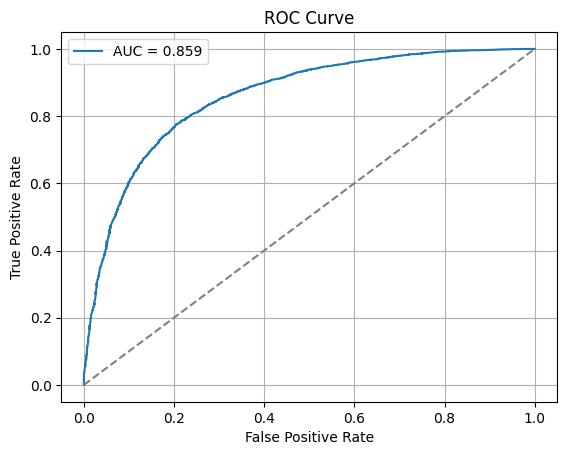

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# # 1) get predicted signal probabilities
# y_prob = mlp.predict_proba(X_test_s)[:, 1]

# # 2) compute the ROC points (with your test weights)
# fpr, tpr, _ = roc_curve(y_test, y_prob, sample_weight=w_test)

# # 3) compute AUC in one go (this accepts sample_weight)
# roc_auc = roc_auc_score(y_test, y_prob, sample_weight=w_test)

import numpy as np
from sklearn.metrics import auc

# find the first occurrence of each unique fpr
_, unique_idxs = np.unique(fpr, return_index=True)

# grab only those unique points (in order!)
fpr_u = fpr[unique_idxs]
tpr_u = tpr[unique_idxs]

roc_auc = auc(fpr_u, tpr_u)

# then plot as before
plt.plot(fpr_u, tpr_u, label=f"AUC = {roc_auc:.3f}")



# 4) plot

plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# import numpy as np

# # Compute sampling probabilities proportional to w_train
# p = w_train / np.sum(w_train)

# # Draw N_train samples with replacement
# idx = np.random.choice(len(w_train), size=len(w_train), p=p)

# X_resampled = X_train_s[idx]
# y_resampled = y_train[idx]

# # Retrain on this weighted bootstrap sample
# mlp = MLPClassifier(
#     hidden_layer_sizes=(50, 25),
#     activation="relu",
#     solver="adam",
#     max_iter=500,
#     verbose=True
# )
# mlp.fit(X_resampled, y_resampled)


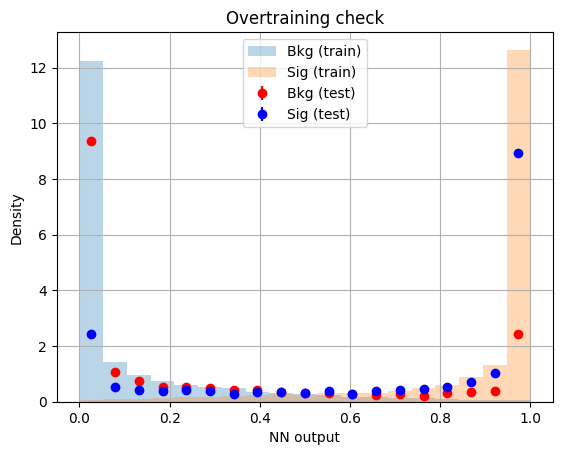

In [ ]:
#checking uoverfitting
import numpy as np
import matplotlib.pyplot as plt

# Get the NN score on train & test
y_prob_train = mlp.predict_proba(X_train_s)[:,1]
y_prob_test  = mlp.predict_proba(X_test_s )[:,1]

# Separate signal & background in each
sig_train = y_prob_train[y_train==1]
bkg_train = y_prob_train[y_train==0]
sig_test  = y_prob_test [y_test ==1]
bkg_test  = y_prob_test [y_test ==0]

# Plot filled histograms + error bars
bins = np.linspace(0,1,20)
plt.hist(bkg_train, bins=bins, histtype="stepfilled", alpha=0.3, density=True, label="Bkg (train)")
plt.hist(sig_train, bins=bins, histtype="stepfilled", alpha=0.3, density=True, label="Sig (train)")
# test as points with Poisson errors
for arr, col, lab in [(bkg_test,"red","Bkg (test)"), (sig_test,"blue","Sig (test)")]:
    hist, edges = np.histogram(arr, bins=bins, density=True)
    centers = 0.5*(edges[:-1]+edges[1:])
    errs    = np.sqrt(hist * len(arr)) / len(arr)
    plt.errorbar(centers, hist, yerr=errs, fmt="o", color=col, label=lab)

plt.xlabel("NN output"); plt.ylabel("Density")
plt.legend(); plt.grid()
plt.title("Overtraining check")
plt.show()


/Users/xin/Documents/Documents/College/Phys_392/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


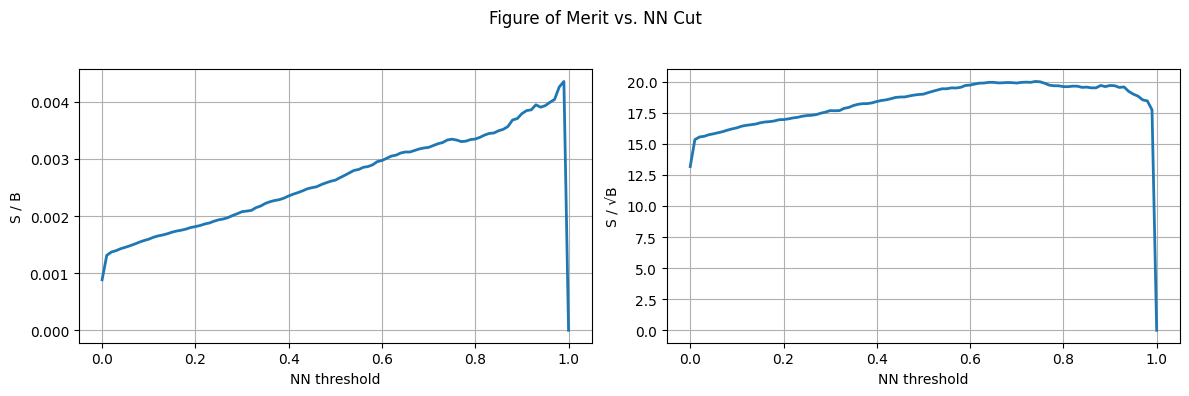

→ Best NN threshold (max S/√B): 0.740
Kept 17811 / 43937 events (40.5%)


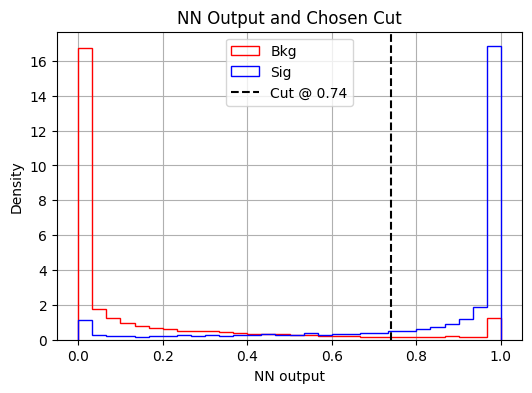

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# — assume these exist from your earlier steps —
# mlp            : trained MLPClassifier
# scaler         : StandardScaler fit on X_train
# features       : list of column names used as inputs
# df             : full pandas DataFrame with those columns + totalWeight + isSignal
# y_test, w_test : arrays for your test split
# X_test_s       : scaled test features
# y_prob         : NN scores on test (if not defined, compute now)

# 0) (Re)compute NN output on test and full df
y_prob = mlp.predict_proba(X_test_s)[:, 1]
df["NN_output"] = mlp.predict_proba(scaler.transform(df[features]))[:, 1]

# 1) scan thresholds
ths = np.linspace(0, 1, 101)
S_over_B     = []
S_over_sqrtB = []

for t in ths:
    mask = (y_prob > t)
    S = np.sum(w_test[(y_test == 1) & mask])
    B = np.sum(w_test[(y_test == 0) & mask])
    if B>0:
        S_over_B.append(S / B)
        S_over_sqrtB.append(S / np.sqrt(B))
    else:
        S_over_B.append(0)
        S_over_sqrtB.append(0)

# 2) plot S/B and S/√B vs threshold
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(ths, S_over_B,   lw=2)
ax1.set_xlabel("NN threshold"); ax1.set_ylabel("S / B")
ax1.grid()

ax2.plot(ths, S_over_sqrtB, lw=2)
ax2.set_xlabel("NN threshold"); ax2.set_ylabel("S / √B")
ax2.grid()

plt.suptitle("Figure of Merit vs. NN Cut")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# 3) choose best threshold (max S/√B)
best_idx = int(np.argmax(S_over_sqrtB))
best_t   = ths[best_idx]
print(f"→ Best NN threshold (max S/√B): {best_t:.3f}")

# 4) apply to full DataFrame
df_sel = df[df.NN_output > best_t]
print(f"Kept {len(df_sel)} / {len(df)} events "
      f"({100*len(df_sel)/len(df):.1f}%)")

# 5) plot NN‐output distribution with cut
plt.figure(figsize=(6,4))
# background
plt.hist(df[df.isSignal==0].NN_output,
         bins=30, density=True, histtype="step", label="Bkg", color="red")
# signal
plt.hist(df[df.isSignal==1].NN_output,
         bins=30, density=True, histtype="step", label="Sig", color="blue")
plt.axvline(best_t, color="black", linestyle="--",
            label=f"Cut @ {best_t:.2f}")
plt.xlabel("NN output"); plt.ylabel("Density")
plt.title("NN Output and Chosen Cut")
plt.legend(); plt.grid()
plt.show()


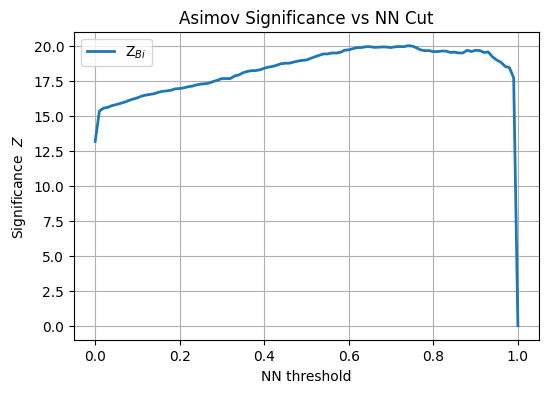

→ Best threshold = 0.740, giving Z = 20.008 σ
Selected 17811 / 43937 events (40.5%)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define the Z_bi function
def Z_bi(S, B):
    # avoid division-by-zero
    return np.sqrt(2 * ((S + B) * np.log(1 + S/B) - S)) if B>0 else 0.

# 2) Scan NN thresholds
ths = np.linspace(0, 1, 101)
Z_vals = []

for t in ths:
    mask = (y_prob > t)
    S = np.sum(w_test[(y_test == 1) & mask])   # weighted signal
    B = np.sum(w_test[(y_test == 0) & mask])   # weighted background
    Z_vals.append(Z_bi(S, B))

# 3) Plot significance vs threshold
plt.figure(figsize=(6,4))
plt.plot(ths, Z_vals, lw=2, label="Z$_{Bi}$")
plt.xlabel("NN threshold")
plt.ylabel("Significance  $Z$")
plt.title("Asimov Significance vs NN Cut")
plt.grid()
plt.legend()
plt.show()

# 4) Pick the best operating point
best = np.argmax(Z_vals)
best_t = ths[best]
best_Z = Z_vals[best]
print(f"→ Best threshold = {best_t:.3f}, giving Z = {best_Z:.3f} σ")

# 5) If you like, apply it to your full df:
df_sel = df[df.NN_output > best_t]
print(f"Selected {len(df_sel)} / {len(df)} events ({100*len(df_sel)/len(df):.1f}%)")
